In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$E(2\bar{X})$ = $2E(\bar{X})$ = $2E(\frac{\sum{X_{i}}}{n})$ = $\frac{2}{n}E(\sum{X_{i}})$

$ = \frac{2}{n}\sum{E(X_{i})} = \frac{2}{n}\sum{\frac{b}{2}} = \frac{2bn}{2n} = b$

Therefore, $\hat{b}_{MoM}$ is unbiased

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

In [20]:
A = stats.expon(scale = 1/5)
L = []
for n in np.arange(10000):
    N = A.rvs(size = 20)
    L = np.append(L,1/np.mean(N))
    
np.mean(L)

5.270361030189736

The average of $\hat{\lambda}$ is close to 5.25 and does not fluctuate much with repeated trials. We may assume that there is a bias in this estimator since this is significantly off the actual value of 5.

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

$Var(\hat{b}) = Var(2\bar{X}) = 4Var(\frac{\sum{X_{i}}}{n}) = \frac{4}{n^2}Var(\sum{X_{i}}) = \frac{4}{n^2}\sum{Var(X_{i})}$

$ = \frac{4}{n^2}\sum{\frac{b^2}{12}} = \frac{nb^2}{3n^2} = \frac{b^2}{3n}$

As n increases, Var($\hat{b}$) approaches 0. Therefore $\hat{b}$ is  consistent.

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

$Var(\bar{X}) = Var(\frac{\sum{X_{i}}}{n}) = \frac{1}{n^2}\sum{Var(X_{i})} = \frac{1}{n^2}\sum{\sigma^2}$

$Var(\bar{X}) = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$

As n approaches infinity, $Var(\bar{X})$ approaches 0. Thus, $\hat{\mu}$ is consistent.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

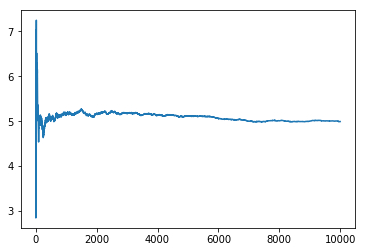

In [21]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()